In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats as st
%matplotlib inline

In [3]:
a =  np.load("0.weight.neg.npy")
print(a.shape)

(14400, 2)


In [4]:
shape = [(192, 3, 5, 5),(160, 192, 1, 1),(96, 160, 1, 1),(192, 96, 5, 5),(192, 192, 1, 1),(192, 192, 1, 1),(192, 192, 3, 3),(192, 192, 1, 1),(10, 192, 1, 1)]
b = np.zeros(shape[0])
size0 = b.shape[0]
size1 = b.shape[1]
size2 = b.shape[2]
size3 = b.shape[3]
for t in range(len(a)):
    i = a[t][0]
    b[int(i/size1/size2/size3)][int(i/size2/size3%size1)][int(i/size3%size2)][int(i%size3)] = a[t][1]

In [5]:
c = b.swapaxes(1,3)
c = (c>0.01) * 1.0
TheMap = np.zeros([size2,size3])
for i in range(size0):
    for j in range(size2):
        for k in range(size3):
            for l in range(size1):
                TheMap[j][k] += c[i][j][k][l]
print TheMap

[[447. 451. 445. 458. 442.]
 [445. 440. 448. 450. 451.]
 [446. 451. 453. 447. 457.]
 [451. 454. 455. 457. 454.]
 [444. 449. 454. 453. 449.]]


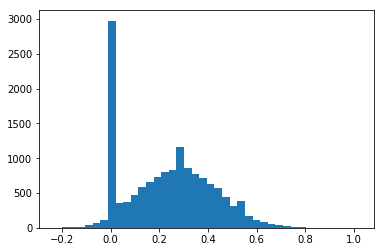

In [6]:
n, bins, patches = plt.hist(a[:,1],40,histtype='bar')
#n, bins, patches = plt.hist(b.reshape(-1),int(len(b.reshape(-1))/300),histtype='bar')

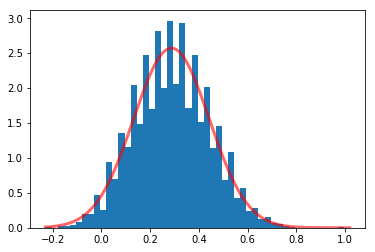

In [13]:
pos = []
for item in a[:,1]:
    if abs(item) > 0.0001:
        pos += [item]
        
fig, ax = plt.subplots(1, 1)
n, bins, patches = ax.hist(pos,50,histtype='bar',density=True)
params = st.norm.fit(pos,bins = 50, density = True)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

# Calculate fitted PDF and error with fit in distribution
x = np.linspace(min(pos),max(pos), 1000)
pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)

ax.plot(x,pdf,
        'r-', lw=3, alpha=0.6, label='norm pdf')

In [15]:
fig = plt.gcf()
fig.savefig('CIFAR_10')

<Figure size 432x288 with 0 Axes>